#### SMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_6384\797791813.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
pd.date_range(start="2020-08", periods=8, freq="W")
df = pd.DataFrame({
   "week":pd.date_range(start="2023-08", periods=8, freq="W"),
   "sales":[39,44,40,45,38,43,39,np.nan],
   "3MA":[0]*8
})

In [5]:
df["3MA"] = df[["sales"]].rolling(3).mean().shift(1)
df

,week,sales,3MA
0,2023-08-06,39.0,NaN
1,2023-08-13,44.0,NaN
2,2023-08-20,40.0,NaN
3,2023-08-27,45.0,41.0
4,2023-09-03,38.0,43.0
5,2023-09-10,43.0,41.0
6,2023-09-17,39.0,42.0
7,2023-09-24,NaN,40.0


In [ ]:
pip install finance-datareader

In [9]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.7 MB 1.7 MB/s eta 0:00:09
   -- ------------------------------------- 0.9/15.7 MB 9.3 MB/s eta 0:00:02
   ------ --------------------------------- 2.5/15.7 MB 17.6 MB/s eta 0:00:01
   --------- ------------------------------ 3.7/15.7 MB 19.9 MB/s eta 0:00:01
   ------------- -------------------------- 5.4/15.7 MB 21.5 MB/s eta 0:00:01
   ------------------- -------------------- 7.8/15.7 MB 26.1 MB/s eta 0:00:01
   ---------------------- ----------------- 8.9/15.7 MB 25.8 MB/s eta 0:00:01
   -------------------------- ------------- 10.5/15.7 MB 31.2 MB/s eta 0:00:01
   ----------------------------- ---------- 11.7/15.7 MB 31.2 MB/s eta 0:00:01
   --------------------------------- ------ 13.3/15.7 MB 32.7 MB/s eta 0:00:01
 

In [10]:
import FinanceDataReader as fdr

In [11]:
df_apple = fdr.DataReader('AAPL', start = '2010')

Text(0.5, 1.0, 'Close Price for Apple')

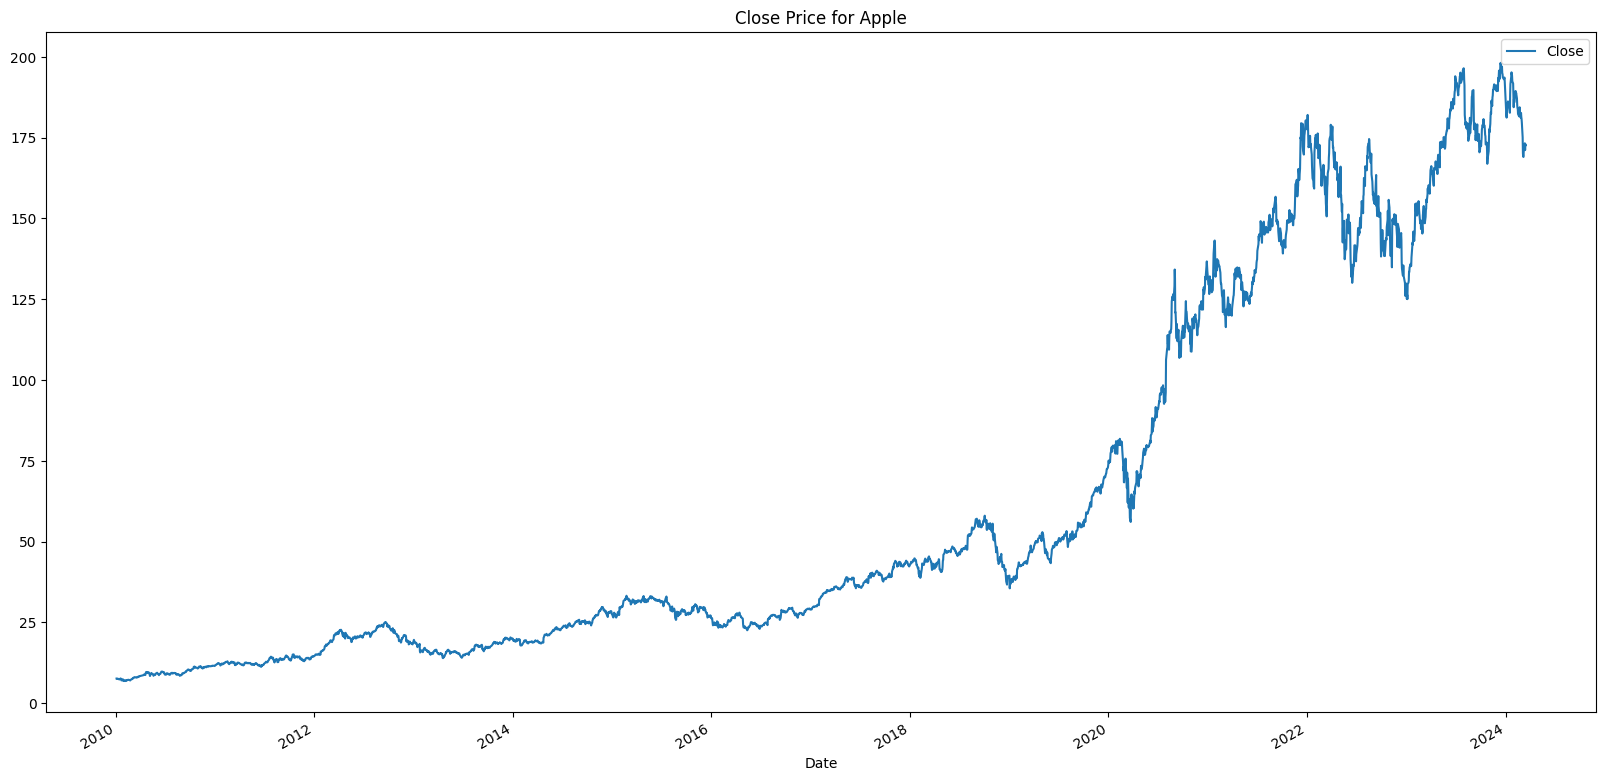

In [12]:
df_apple[['Close']].plot(figsize=(20,10))
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean()
plt.title('Close Price for Apple')

<Axes: xlabel='Date'>

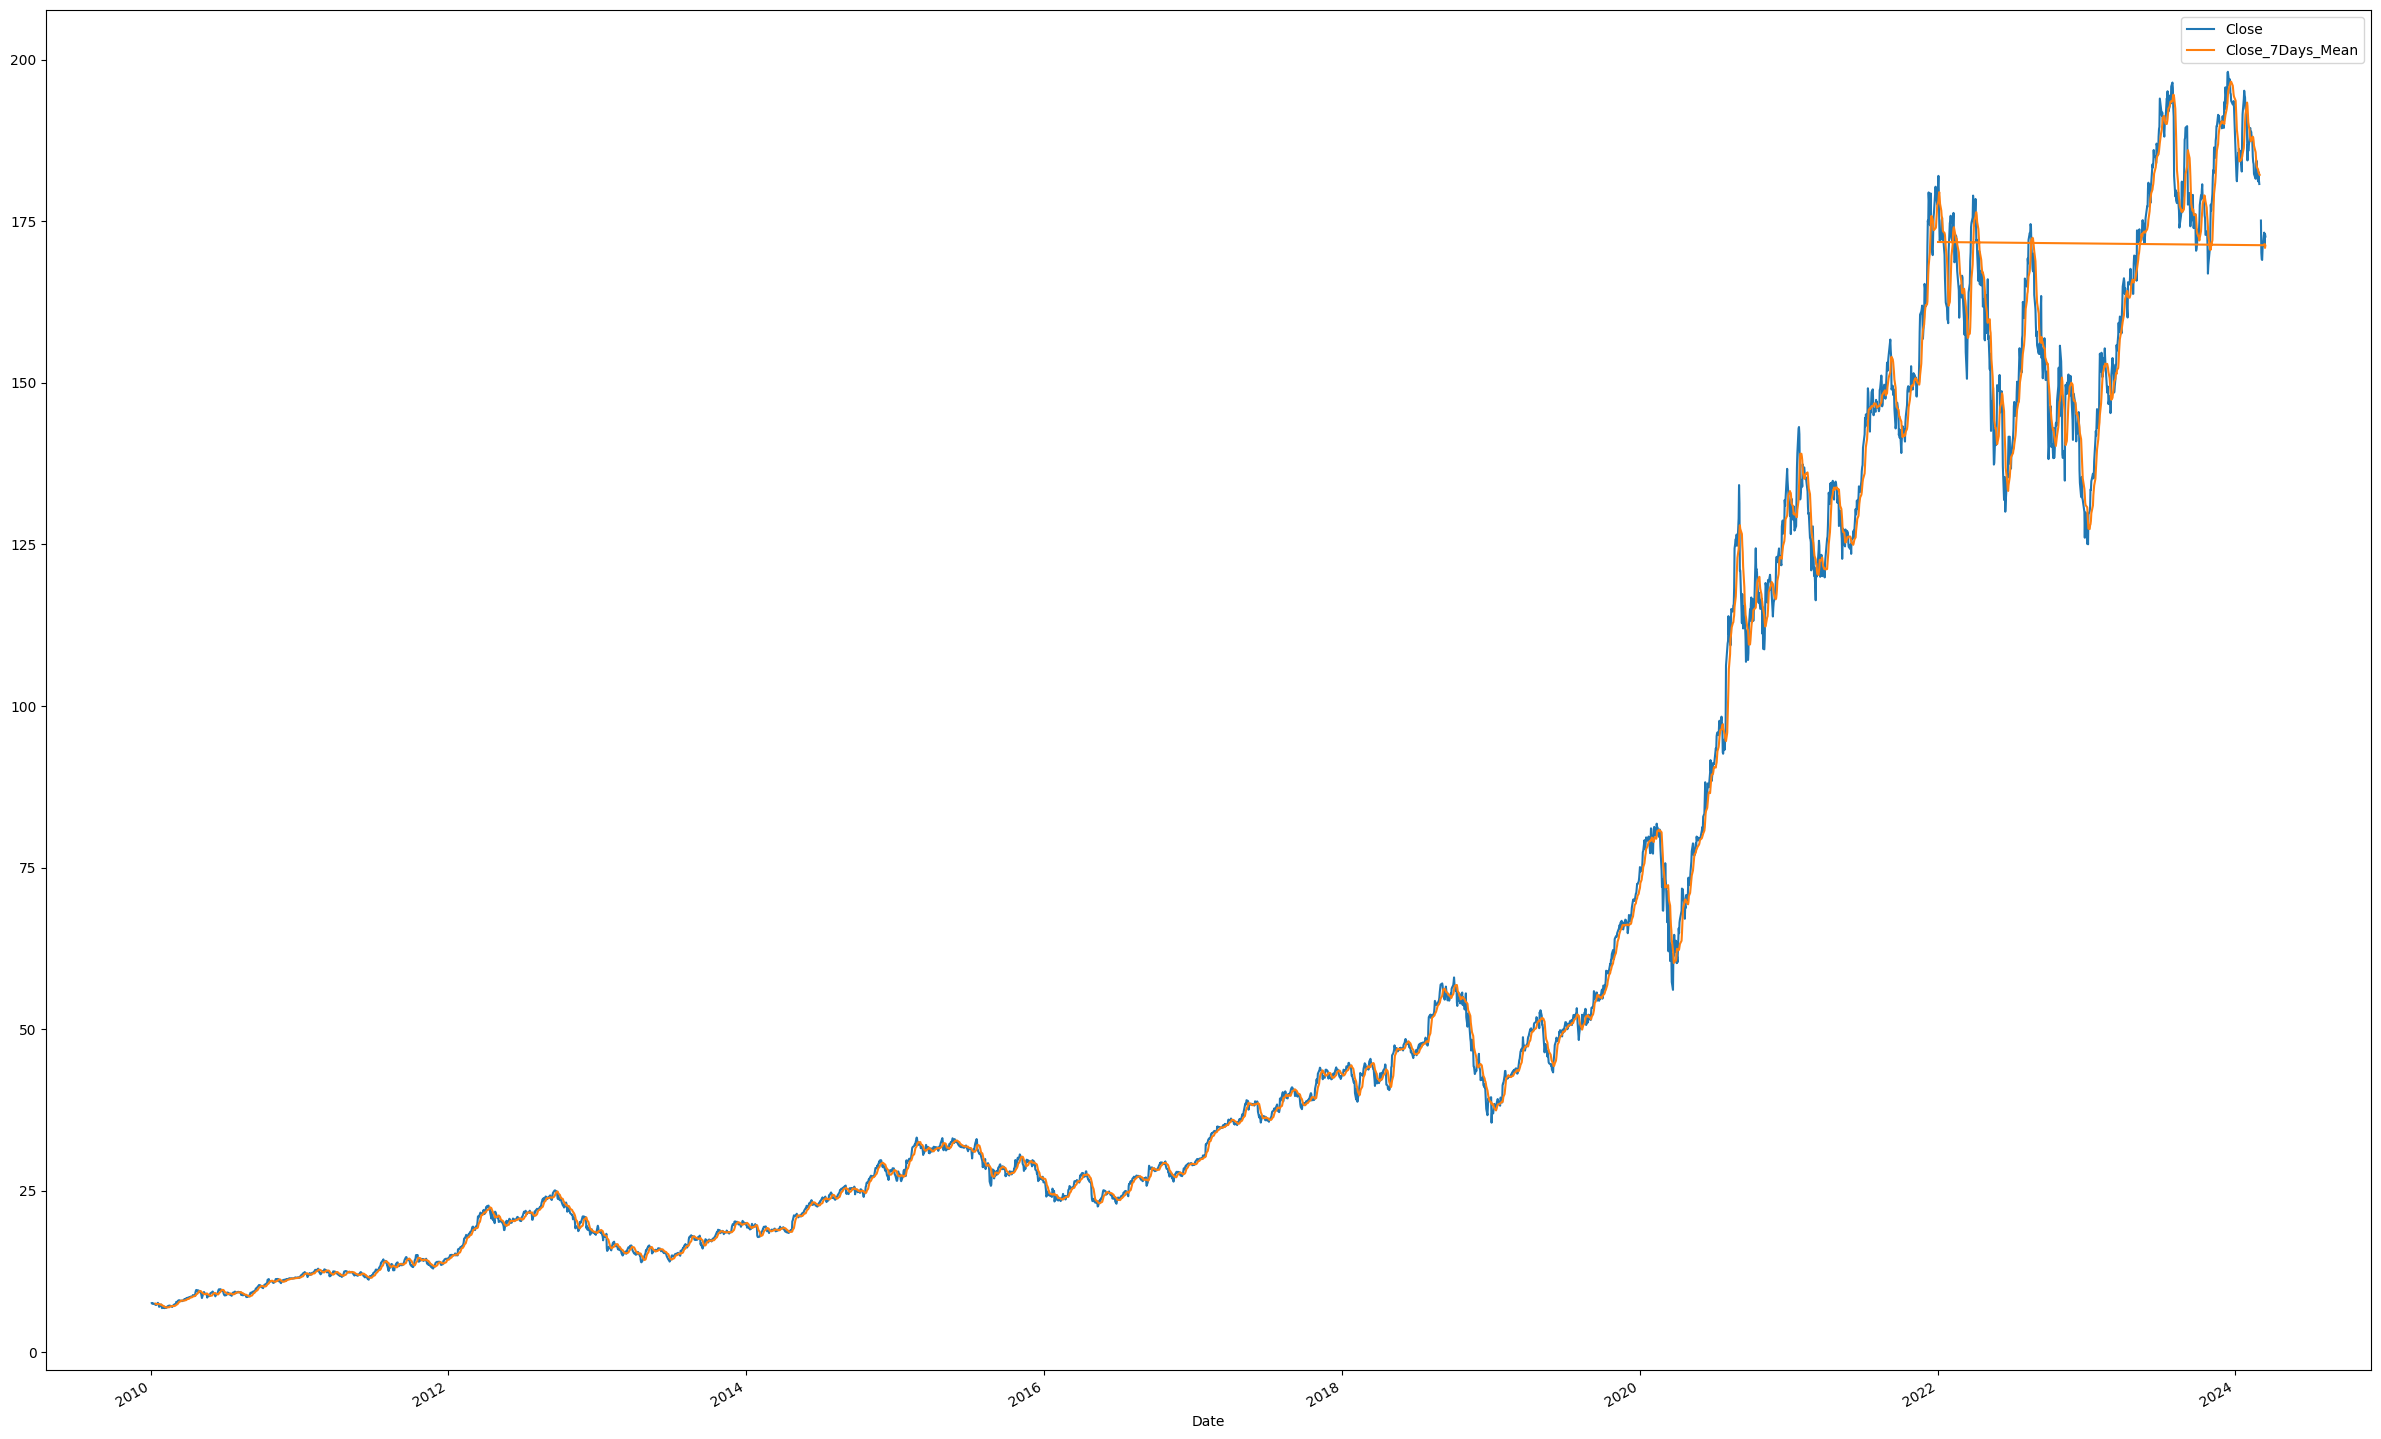

In [15]:
last_day = datetime(2022, 1, 2)
df_apple.loc[last_day, "Close"] = np.nan
df_apple['Close_7Days_Mean'] = df_apple['Close'].rolling(7).mean().shift(1)
df_apple[['Close', 'Close_7Days_Mean']].plot(figsize=(30,20))

#### EMA (EWM)

<Axes: xlabel='index'>

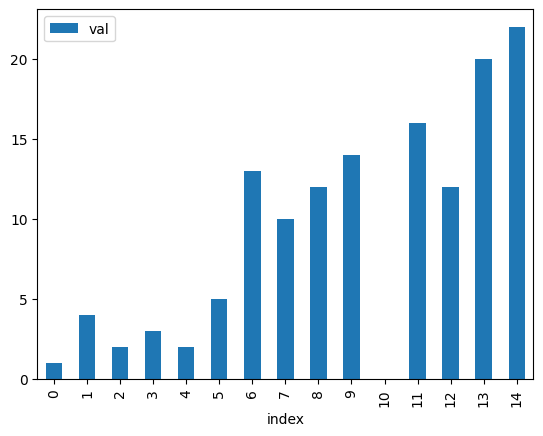

In [19]:
import pandas as pd
data = {'val':[1,4,2,3,2,5,13,10,12,14,np.NaN,16,12,20,22]} 
df = pd.DataFrame(data).reset_index()
# df['val'].plot.bar(rot=0, subplots=True)
df.plot(kind='bar',x='index',y='val')

In [23]:
df

,index,val
0,0,1.0
1,1,4.0
2,2,2.0
3,3,3.0
4,4,2.0
5,5,5.0
6,6,13.0
7,7,10.0
8,8,12.0
9,9,14.0


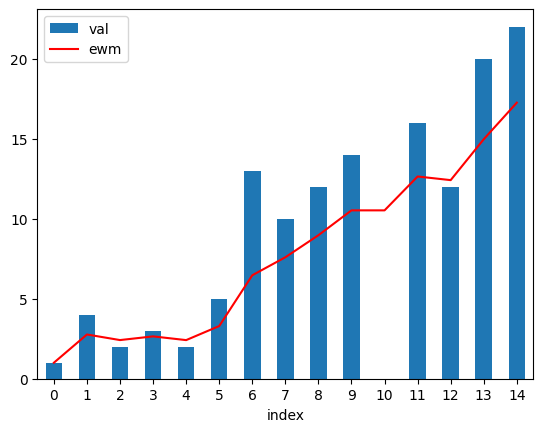

In [21]:
import matplotlib.pyplot as plt
df2 = df.assign(ewm=df['val'].ewm(alpha=0.3).mean()) # val열에 ewm 메서드적용 후 df에 추가
ax = df.plot(kind='bar',x='index',y='val') # ax에 df의 bar chart 생성
ax2= df2.plot(kind='line',x='index', y='ewm', color='red', ax=ax) # ax2에 df2의 line chart 생성후 ax에 추가
plt.show() # 그래프 출력

In [24]:
df2

,index,val,ewm
0,0,1.0,1.000000
1,1,4.0,2.764706
2,2,2.0,2.415525
3,3,3.0,2.646269
4,4,2.0,2.413220
5,5,5.0,3.292727
6,6,13.0,6.466263
7,7,10.0,7.591237
8,8,12.0,8.969483
9,9,14.0,10.522507
